In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [9]:
df=pd.read_csv(r"C:\Users\shiva\OneDrive\Desktop\Beer.csv",parse_dates=["Month"])

In [10]:
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [11]:
df = df.groupby('Month')['Monthly beer production'].sum().reset_index()

In [12]:
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [13]:
df=df.set_index('Month')

In [14]:
df

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [15]:
quarterly_resampled_data = df['Monthly beer production'].resample('Q').mean()
quarterly_resampled_data 

Month
1956-03-31     94.800000
1956-06-30     70.933333
1956-09-30     75.633333
1956-12-31    102.800000
1957-03-31     87.333333
                 ...    
1994-09-30    137.666667
1994-12-31    177.333333
1995-03-31    142.000000
1995-06-30    136.000000
1995-09-30    136.000000
Freq: Q-DEC, Name: Monthly beer production, Length: 159, dtype: float64

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [37]:
seasonal_pdq

[(0, 0, 0, 4),
 (0, 0, 1, 4),
 (0, 1, 0, 4),
 (0, 1, 1, 4),
 (1, 0, 0, 4),
 (1, 0, 1, 4),
 (1, 1, 0, 4),
 (1, 1, 1, 4)]

In [38]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(quarterly_resampled_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:2012.7487771812343
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1772.0360740565043
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:1032.923602549216
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:1010.8042428027064
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:1037.2092845206691
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:1031.676569352955
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:1016.7268973286967
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:1012.8019647471893
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1835.2787398537084
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:1604.5013876517842
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:1027.9571743137976
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:1005.9955830308647


C:\Users\shiva\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:1039.1862740300626
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:1026.7094633155443
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:1017.6096385065521
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:1007.9617876548608
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:1434.9939153564846
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:1276.5993092198805
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:1119.1452187668933
ARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:1033.0221628196418
ARIMA(0, 1, 0)x(1, 0, 0, 4)4 - AIC:1124.0195722302478
ARIMA(0, 1, 0)x(1, 0, 1, 4)4 - AIC:1056.9733254699618
ARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:1076.4980935925055
ARIMA(0, 1, 0)x(1, 1, 1, 4)4 - AIC:1035.0191490944917
ARIMA(0, 1, 1)x(0, 0, 0, 4)4 - AIC:1343.9221686681822
ARIMA(0, 1, 1)x(0, 0, 1, 4)4 - AIC:1178.265455774123
ARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:1002.3749198022688
ARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:941.2856560612648
ARIMA(0, 1, 1)x(1, 0, 0, 4)4 - AIC:1014.5933981435909
ARIMA(0, 1, 1)x(1, 0, 1, 4)4 - AIC:965.4867042889616
ARIMA(0, 1, 1)x(1, 1, 0, 4)4 - 

In [ ]:
#lower AIC means a model is considered to be closer to the truth
#The Order=(1,0,1) and seasonal order=(1,1,1,4) seem to give best results

In [43]:
mod = sm.tsa.statespace.SARIMAX(quarterly_resampled_data,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9873      0.014     72.038      0.000       0.960       1.014
ma.L1         -1.4070      0.110    -12.776      0.000      -1.623      -1.191
ar.S.L4        0.1196      0.106      1.129      0.259      -0.088       0.327
ma.S.L4       -0.7758      0.073    -10.610      0.000      -0.919      -0.632
sigma2        15.8647      2.801      5.664      0.000      10.375      21.355


In [ ]:
#To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series 
#we set forecasts to start at 2017-01-01 to the end of the data.

In [44]:
pred = results.get_prediction(start=pd.to_datetime('1992-03-31'), dynamic=False)
pred_ci = pred.conf_int()


In [45]:
pred

In [46]:
#Confidence Interval of our Predicted Sales
pred_ci

,lower Monthly beer production,upper Monthly beer production
Month,,
1992-03-31,146.707123,168.675544
1992-06-30,129.604250,151.572671
1992-09-30,131.452815,153.421236
1992-12-31,174.984177,196.952598
1993-03-31,136.868996,158.837417
1993-06-30,122.619892,144.588313
1993-09-30,127.347170,149.315591
1993-12-31,168.683865,190.652286
1994-03-31,132.273383,154.241804


In [47]:
quarterly_resampled_data['1992':]

Month
1992-03-31    147.666667
1992-06-30    136.666667
1992-09-30    140.000000
1992-12-31    177.333333
1993-03-31    144.000000
1993-06-30    140.000000
1993-09-30    137.000000
1993-12-31    170.666667
1994-03-31    149.666667
1994-06-30    127.333333
1994-09-30    137.666667
1994-12-31    177.333333
1995-03-31    142.000000
1995-06-30    136.000000
1995-09-30    136.000000
Freq: Q-DEC, Name: Monthly beer production, dtype: float64

In [48]:
quarterly_resampled_data_forecasted = pred.predicted_mean #Predicted Values
quarterly_resampled_data_truth = quarterly_resampled_data['1992-03-31':] #Avctual Values

# Compute the mean square error
mse = ((quarterly_resampled_data_forecasted - quarterly_resampled_data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(mse))

The Mean Squared Error of our forecasts is 34.2365136831714


In [49]:
quarterly_resampled_data_forecasted

Month
1992-03-31    157.691333
1992-06-30    140.588460
1992-09-30    142.437026
1992-12-31    185.968388
1993-03-31    147.853206
1993-06-30    133.604103
1993-09-30    138.331381
1993-12-31    179.668075
1994-03-31    143.257594
1994-06-30    134.784679
1994-09-30    133.596773
1994-12-31    174.238734
1995-03-31    145.578605
1995-06-30    129.438405
1995-09-30    135.869162
Freq: Q-DEC, dtype: float64

In [50]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5.85


In [51]:
quarterly_resampled_data_truth

Month
1992-03-31    147.666667
1992-06-30    136.666667
1992-09-30    140.000000
1992-12-31    177.333333
1993-03-31    144.000000
1993-06-30    140.000000
1993-09-30    137.000000
1993-12-31    170.666667
1994-03-31    149.666667
1994-06-30    127.333333
1994-09-30    137.666667
1994-12-31    177.333333
1995-03-31    142.000000
1995-06-30    136.000000
1995-09-30    136.000000
Freq: Q-DEC, Name: Monthly beer production, dtype: float64

In [52]:
#VISUALIZING RESULTS

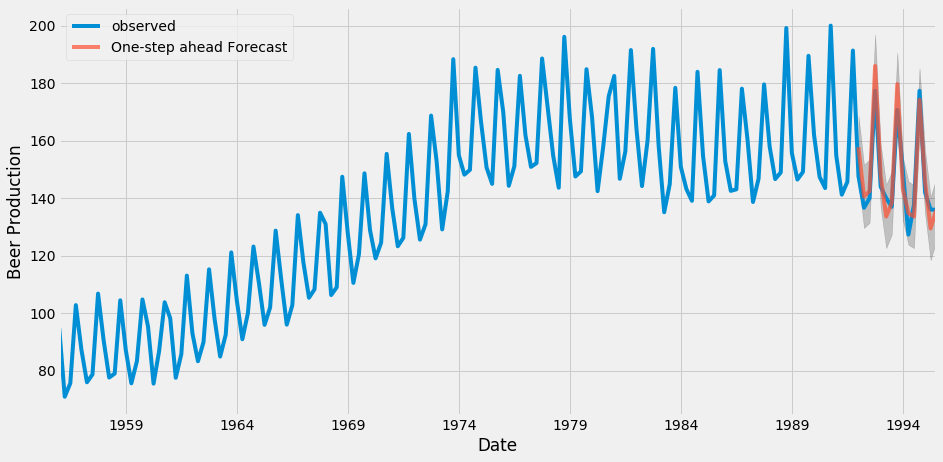

In [53]:
ax = quarterly_resampled_data['1956':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Beer Production')
plt.legend()

plt.show()

In [54]:
quarterly_resampled_data.shape

(159,)

In [55]:
df.shape

(476, 1)